<a href="https://colab.research.google.com/github/Ashish-1521/ML-HW/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

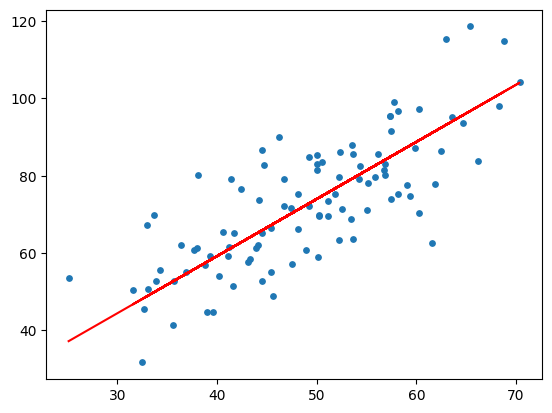

In [ ]:
from pickle import NONE
from os import name
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

data_ = pd.read_csv("/content/sample_data/HW2_linear_data.csv",header=None)
Vector_X = data_.iloc[:,0]
Vector_Y = data_.iloc[:,1]
plt.scatter(Vector_X,Vector_Y,s=15)

# Calculating Gradient Descent values for the loss function with the help of linear equation (y = mx+c)
def Calculate_m_c(Learning_Rate, epochs, X,Y):
  m = 0
  c = 0
  L = Learning_Rate
  y_pred = 0
  n = len(X)
  for i in range(epochs):
    y_pred = m*X + c
    partialDerivative_m = (-2/n)*sum(Vector_X*(Y-y_pred))
    partialDerivative_c = (-2/n)*sum((Y-y_pred))
    m = m-(L*partialDerivative_m)
    c = c-(L*partialDerivative_c)
  y_pred = m*X + c
  return y_pred
# m = 0
# c = 0
# L = 0.0001 # L - learning rate for the model
# epochs = 1000 # no of iterations
# y_pred = 0
# n = len(Vector_X) # no of points

# for i in range(epochs):
#   y_pred = m*Vector_X + c
#   partialDerivative_m = (-2/n)*sum(Vector_X*(Vector_Y-y_pred))
#   partialDerivative_c = (-2/n)*sum((Vector_Y-y_pred))
#   m = m-(L*partialDerivative_m)
#   c = c-(L*partialDerivative_c)
# print(m,c)

predicted_Value = Calculate_m_c(0.0001,1000,Vector_X,Vector_Y)

#plotting against x and predicted y value with minimum loss function
plt.plot(Vector_X,predicted_Value,color='red')
plt.show()

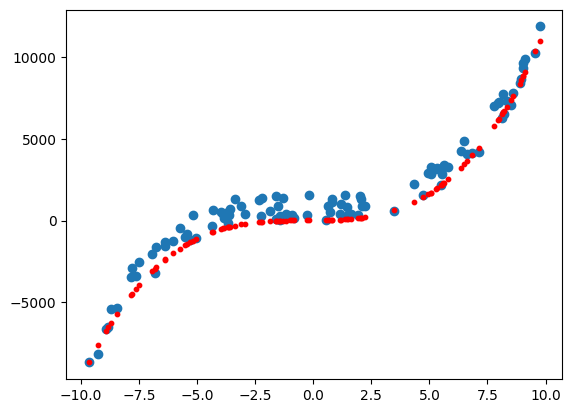

In [136]:
def Calculate_Sigmoid(y_prediction):
  e = 1/(1+np.e**(-y_prediction))
  return e


def Calculate_Gradient_Cubic(Learning_Rate, epochs, X,Y):
  a,b,c,d = 0,0,0,0
  L = Learning_Rate
  y_pred = 0
  n = len(X)
  for i in range(epochs):
    y_pred = a*X**3 + b*X**2+c*X+d
    partialDerivative_a = (-2/n)*sum(Vector_X*(Y-y_pred))
    partialDerivative_b = (-2/n)*sum(Vector_X*(Y-y_pred))
    partialDerivative_c = (-2/n)*sum(Vector_X*(Y-y_pred))
    partialDerivative_d = (-2/n)*sum((Y-y_pred))
    a = a-(L*partialDerivative_a)
    b = b-(L*partialDerivative_b)
    c = c-(L*partialDerivative_c)
    d = d-(L*partialDerivative_d)
  y_pred = a*X**3 + b*X**2+c*X+d
  return y_pred


data_ = pd.read_csv("/content/sample_data/HW2_nonlinear_data.csv",header=0)
Vector_X = data_.iloc[:,0]
Vector_Y = data_.iloc[:,1]
pred_y = Calculate_Gradient_Cubic(0.000001,10000,Vector_X,Vector_Y)
sigmoid_Value = Calculate_Sigmoid(pred_y)
plt.scatter(Vector_X,Vector_Y)
plt.scatter(Vector_X,pred_y,10,color='red')

Epoch 0/10000, Loss: 17036925.042944048
Epoch 1000/10000, Loss: 3550382.9218720333
Epoch 2000/10000, Loss: 3202903.6735168444
Epoch 3000/10000, Loss: 2969591.037076201
Epoch 4000/10000, Loss: 2812916.1585451467
Epoch 5000/10000, Loss: 2707705.322342306
Epoch 6000/10000, Loss: 2637053.7912335275
Epoch 7000/10000, Loss: 2589609.6397737735
Epoch 8000/10000, Loss: 2557749.7851830735
Epoch 9000/10000, Loss: 2536355.149525998
Best coefficients: m=628.9101911853329, c=1094.9194656776533


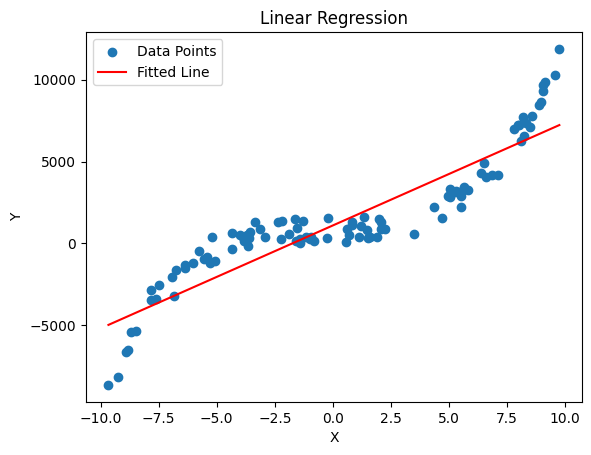

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/sample_data/HW2_nonlinear_data.csv')
X = data['X'].values
y = data['Y'].values

# Define the linear model: Y = mx + c
def linear_model(X, m, c):
    return m * X + c

# Mean Squared Error (MSE) loss function
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Gradient Descent
def gradient_descent(X, y, learning_rate, epochs):
    # Initialize coefficients
    m, c = 1.0, 1.0

    # Store the loss history for plotting
    loss_history = []

    for epoch in range(epochs):
        # Calculate predictions
        y_pred = linear_model(X, m, c)

        # Calculate the gradient of the loss with respect to model parameters
        grad_m = -2 * np.dot(X, y - y_pred)
        grad_c = -2 * np.sum(y - y_pred)

        # Update the coefficients using gradient descent
        m -= learning_rate * grad_m
        c -= learning_rate * grad_c

        # Calculate and store the current loss
        loss = mse_loss(y, y_pred)
        loss_history.append(loss)

        # Print the loss every 1000 epochs
        if epoch % 1000 == 0:
            print(f'Epoch {epoch}/{epochs}, Loss: {loss}')

    return m, c, loss_history

# Hyperparameters
learning_rate = 1e-6
epochs = 10000

# Train the model
best_m, best_c, loss_history = gradient_descent(X, y, learning_rate, epochs)

# Print the best coefficients
print(f'Best coefficients: m={best_m}, c={best_c}')

# Plot the data points and the fitted line
plt.scatter(X, y, label='Data Points')
x_range = np.linspace(min(X), max(X), 100)
y_fit = linear_model(x_range, best_m, best_c)
plt.plot(x_range, y_fit, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()
